<center>
<img src="../../img/ods_stickers.jpg" />
    
## [mlcourse.ai](mlcourse.ai) – Open Machine Learning Course 

Authors: [Yury Kashnitskiy](https://yorko.github.io) and [Maxim Keremet](https://www.linkedin.com/in/maximkeremet/). Translated and edited by  [Artem Trunov](https://www.linkedin.com/in/datamove/), and [Aditya Soni](https://www.linkedin.com/in/aditya-soni-0505a9124/). This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.

# <center>Assignment #1. Spring 2019 <br> 

## <center>Exploratory Data Analysis (EDA) of US flights <br> (using Pandas, Matplotlib & Seaborn)

<img src='../../img/plane_sunset.png' width=50%>

Prior to working on the assignment, you'd better check out the corresponding course material:
 - [Exploratory data analysis with Pandas](https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/topic01_pandas_data_analysis/topic1_pandas_data_analysis.ipynb?flush_cache=true), the same as an interactive web-based [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-1-exploratory-data-analysis-with-pandas)
 - [Visualization: from Simple Distributions to Dimensionality Reduction](https://mlcourse.ai/notebooks/blob/master/jupyter_english/topic02_visual_data_analysis/topic2_visual_data_analysis.ipynb?flush_cache=true), the same as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-2-visual-data-analysis-in-python)
 - [Overview of Seaborn, Matplotlib and Plotly libraries](https://mlcourse.ai/notebooks/blob/master/jupyter_english/topic02_visual_data_analysis/topic2_additional_seaborn_matplotlib_plotly.ipynb?flush_cache=true), the same as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-2-part-2-seaborn-and-plotly) 
 - first lectures in [this](https://www.youtube.com/watch?v=QKTuw4PNOsU&list=PLVlY_7IJCMJeRfZ68eVfEcu-UcN9BbwiX) YouTube playlist 
 - you can also practice with demo assignments, which are simpler and already shared with solutions: [A1 demo](https://www.kaggle.com/kashnitsky/a1-demo-pandas-and-uci-adult-dataset), [solution](https://www.kaggle.com/kashnitsky/a1-demo-pandas-and-uci-adult-dataset-solution), [A2 demo](https://www.kaggle.com/kashnitsky/a2-demo-analyzing-cardiovascular-data), [solution](https://www.kaggle.com/kashnitsky/a2-demo-analyzing-cardiovascular-data-solution)

### Your task is to:
 1. write code and perform computations in the cells below
 2. choose answers in the [webform](https://docs.google.com/forms/d/1Q_5rY7Paed4Xc_THtrfE3OSaB3sJerYuJ7NCHtqRbKs). Solutions will be shared only with those who've filled in this form 
 3. submit answers with some email and **remember it**! This will be your ID during the course. Specify your real full name in the form as well (no nicks allowed in the final top-100 [rating](https://mlcourse.ai/rating)). If in doubt, you can re-submit the form till the deadline for A1, no problem, but stick to only one email.
 
### <center> Deadline for A1: 2019 February 24, 20:59 GMT (London time)
    
You'll get up to 12 credits for this assignment - the web-form score will be halved and rounded.

### How to get help
In [ODS Slack](https://opendatascience.slack.com) (if you still don't have access, fill in the [form](https://docs.google.com/forms/d/1BMqcUc-hIQXa0HB_Q2Oa8vWBtGHXk8a6xo5gPnMKYKA/edit) mentioned on the mlcourse.ai main page), we have a channel **#mlcourse_ai_news** with announcements from the course team.
You can discuss the course content freely in the **#mlcourse_ai** channel (we still have a huge Russian-speaking group, they have a separate channel **#mlcourse_ai_rus**).

Here's how you reply in a thread (press this dialog icon to drill down into a thread):

<img src="../../img/start_a_thread.png" />

Please stick to special threads for your questions:
 - [#a1_q1-5](https://opendatascience.slack.com/archives/C91N8TL83/p1549882488049500) for questions 1-5 below
 - [#a1_q6-10](https://opendatascience.slack.com/archives/C91N8TL83/p1549882494049700) for questions 6-10 below
 - [#a1_q11-15](https://opendatascience.slack.com/archives/C91N8TL83/p1549882499049900) for questions 11-15 below
 - [#a1_q16-20](https://opendatascience.slack.com/archives/C91N8TL83/p1549882508050200) for questions 16-20 below
 
Help each other without sharing correct code and answers. Our TA Maxim @maximkeremet is there to help (only in the mentioned threads, do not write to him directly).

Lastly, you can save useful messages by pinning them, further you can find pinned items on the top, just below the channel name:

<img src="../../img/pinned_item.png" />

In [1]:
import numpy as np
import pandas as pd
# pip install seaborn 
import seaborn as sns
import matplotlib.pyplot as plt

* Download the data [archive](http://stat-computing.org/dataexpo/2009/2008.csv.bz2) (Archived ~ 114 Mb, unzipped - ~ 690 Mb, [alternative link](https://drive.google.com/file/d/1C5nTzitvJ0ho2Crpqnghg9r2yq98Xxun/view?usp=sharing)). No need to unzip - pandas can unbzip on the fly.
* Place it in the "../../data" folder, or change the path below according to your location.
* The dataset has information about carriers and flights between US airports during the year 2008. 
* Column description is available [here](http://www.transtats.bts.gov/Fields.asp?Table_ID=236). Visit this site to find ex. meaning of flight cancellation codes.

Consider the following terms we use:
* unique flight - a record (row) in the dataset
* completed flight = flight that is not cancelled (Cancelled==0 in the dataset)
* flight code - a combination of ['UniqueCarrier','FlightNum'], i.e.  UA52
* airport code - a three letter airport alias from 'Origin or 'Dest' columns

**Reading data into memory and creating a Pandas ``DataFrame`` object**

(This may take a while, be patient)

We are not going to read in the whole dataset. In order to reduce memory footprint, we instead load only needed columns and cast them to suitable data types.

In [2]:
dtype = {'DayOfWeek': np.uint8, 'DayofMonth': np.uint8, 'Month': np.uint8 , 
         'Cancelled': np.uint8, 'Year': np.uint16, 'FlightNum': np.uint16 , 
         'Distance': np.uint16, 'UniqueCarrier': str, 'CancellationCode': str, 
         'Origin': str, 'Dest': str, 'ArrDelay': np.float16, 
         'DepDelay': np.float16, 'CarrierDelay': np.float16, 
         'WeatherDelay': np.float16, 'NASDelay': np.float16, 
         'SecurityDelay': np.float16, 'LateAircraftDelay': np.float16, 
         'DepTime': np.float16}

In [3]:
%%time
# change the path if needed
path = '../../data/2008.csv.bz2'
flights_df = pd.read_csv(path, usecols=dtype.keys(), dtype=dtype)

CPU times: user 41.2 s, sys: 532 ms, total: 41.7 s
Wall time: 41.7 s


**Check the number of rows and columns and print column names.**

In [4]:
print(flights_df.shape)
print(flights_df.columns)

(7009728, 19)
Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'UniqueCarrier',
       'FlightNum', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance',
       'Cancelled', 'CancellationCode', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')


**Print first 5 rows of the dataset.**

In [5]:
flights_df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,WN,335,-14.0,8.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,WN,3231,2.0,19.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,WN,448,14.0,8.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,WN,1746,-6.0,-4.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,WN,3920,34.0,34.0,IND,BWI,515,0,NaN,2.0,0.0,0.0,0.0,32.0


**Transpose the frame to see all features at once.**

In [6]:
flights_df.head().T

,0,1,2,3,4
Year,2008,2008,2008,2008,2008
Month,1,1,1,1,1
DayofMonth,3,3,3,3,3
DayOfWeek,4,4,4,4,4
DepTime,2003,754,628,926,1829
UniqueCarrier,WN,WN,WN,WN,WN
FlightNum,335,3231,448,1746,3920
ArrDelay,-14,2,14,-6,34
DepDelay,8,19,8,-4,34
Origin,IAD,IAD,IND,IND,IND


**Examine data types of all features and total dataframe size in memory.**

In [7]:
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 19 columns):
Year                 uint16
Month                uint8
DayofMonth           uint8
DayOfWeek            uint8
DepTime              float16
UniqueCarrier        object
FlightNum            uint16
ArrDelay             float16
DepDelay             float16
Origin               object
Dest                 object
Distance             uint16
Cancelled            uint8
CancellationCode     object
CarrierDelay         float16
WeatherDelay         float16
NASDelay             float16
SecurityDelay        float16
LateAircraftDelay    float16
dtypes: float16(8), object(4), uint16(3), uint8(4)
memory usage: 387.7+ MB


**Get basic statistics of each feature.**

In [8]:
flights_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7009728.0,2008.000000,0.000000,2008.0,2008.0,2008.0,2008.0,2008.0
Month,7009728.0,6.375130,3.406737,1.0,3.0,6.0,9.0,12.0
DayofMonth,7009728.0,15.728015,8.797068,1.0,8.0,16.0,23.0,31.0
DayOfWeek,7009728.0,3.924182,1.988259,1.0,2.0,4.0,6.0,7.0
DepTime,6873482.0,NaN,NaN,1.0,928.0,1325.0,1728.0,2400.0
FlightNum,7009728.0,2224.200105,1961.715999,1.0,622.0,1571.0,3518.0,9743.0
ArrDelay,6855029.0,NaN,NaN,-519.0,-10.0,-2.0,12.0,2460.0
DepDelay,6873482.0,NaN,NaN,-534.0,-4.0,-1.0,8.0,2468.0
Distance,7009728.0,726.387029,562.101803,11.0,325.0,581.0,954.0,4962.0
Cancelled,7009728.0,0.019606,0.138643,0.0,0.0,0.0,0.0,1.0


**Count unique Carriers and plot their relative share of flights:**

In [9]:
flights_df['UniqueCarrier'].nunique()

20

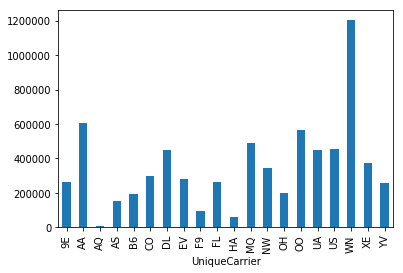

In [10]:
flights_df.groupby('UniqueCarrier').size().plot(kind='bar');

**We can also _group by_ category/categories in order to calculate different aggregated statistics.**

**For example, finding top-3 flight codes, that have the largest total distance travelled in year 2008.**

In [11]:
flights_df.groupby(['UniqueCarrier','FlightNum'])['Distance'].sum().sort_values(
    ascending=False).iloc[:3]

UniqueCarrier  FlightNum
CO             15           1796244.0
               14           1796244.0
UA             52           1789722.0
Name: Distance, dtype: float64

**Another way:**

In [12]:
flights_df.groupby(['UniqueCarrier','FlightNum'])\
  .agg({'Distance': [np.mean, np.sum, 'count'],
        'Cancelled': np.sum})\
  .sort_values(('Distance', 'sum'), ascending=False)\
  .iloc[0:3]

Cancelled     Distance                 
                              sum         mean        sum count
UniqueCarrier FlightNum                                        
CO            15                0  4962.000000  1796244.0   362
              14                0  4962.000000  1796244.0   362
UA            52                8  2465.181818  1789722.0   726

**Number of flights by days of week and months:**

In [13]:
pd.crosstab(flights_df.Month, flights_df.DayOfWeek)

DayOfWeek,1,2,3,4,5,6,7
Month,,,,,,,
1,80807,97298,100080,102043,81940,67178,76419
2,81504,79700,80587,82158,102726,66462,76099
3,103210,81159,82307,82831,82936,86153,97494
4,82463,100785,102586,82799,82964,68304,78225
5,80626,79884,81264,102572,102878,84493,74576
6,104168,82160,82902,83617,83930,72322,99566
7,84095,103429,103315,105035,79349,72219,80489
8,82983,80895,81773,82625,103878,86155,93970
9,94300,91533,74057,75589,75881,58343,71205


**It can also be handy to color such tables in order to easily notice outliers:**

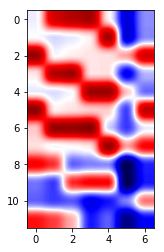

In [14]:
plt.imshow(pd.crosstab(flights_df.Month, flights_df.DayOfWeek),
           cmap='seismic', interpolation='kaiser');

**Flight distance histogram:**

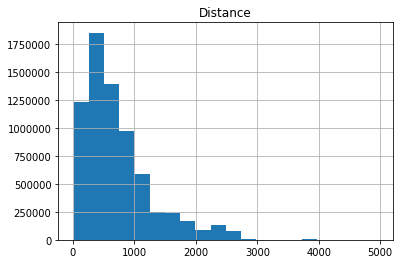

In [15]:
flights_df.hist('Distance', bins=20);

**Making a histogram of flight frequency by date.**

In [16]:
flights_df['Date'] = pd.to_datetime(flights_df.rename(
    columns={'DayofMonth': 'Day'})[['Year', 'Month', 'Day']])

In [17]:
num_flights_by_date = flights_df.groupby('Date').size()

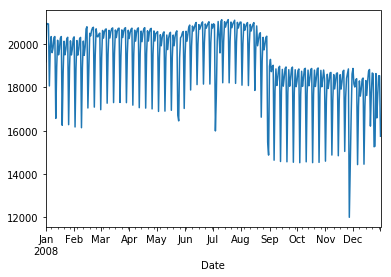

In [18]:
num_flights_by_date.plot();

**Do you see a weekly pattern above? And below?**

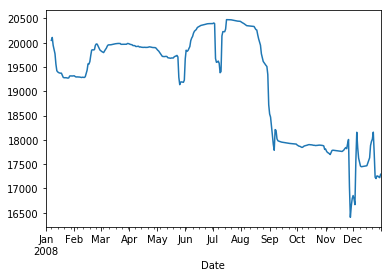

In [19]:
num_flights_by_date.rolling(window=7).mean().plot();

**We'll need a new column in our dataset - departure hour, let's create it.**

As we see, `DepTime` is distributed from 1 to 2400 (it is given in the `hhmm` format, check the [column description](https://www.transtats.bts.gov/Fields.asp?Table_ID=236) again). We'll treat departure hour as `DepTime` // 100 (divide by 100 and apply the `floor` function). However, now we'll have both hour 0 and hour 24. Hour 24 sounds strange, we'll set it to be 0 instead (a typical imperfectness of real data, however, you can check that it affects only 521 rows, which is sort of not a big deal). So now values of a new column `DepHour` will be distributed from 0 to 23. There are some missing values, for now we won't fill in them, just ignore them. 

In [20]:
flights_df['DepHour'] = flights_df['DepTime'] // 100
flights_df['DepHour'].replace(to_replace=24, value=0, inplace=True)

In [21]:
flights_df['DepHour'].describe()

count    6873482.0
mean           NaN
std            0.0
min            0.0
25%            9.0
50%           13.0
75%           17.0
max           23.0
Name: DepHour, dtype: float64

### Now it's your turn. Answer the questions below.

**1. How many unique carriers are there in our dataset?**

- 10
- 15
- 20
- 25 

In [22]:
flights_df['UniqueCarrier'].nunique()

20

**2. We have  both cancelled and completed flights in the datset. Check if there are more completed or cancelled flights. What is the difference?** <br>

*Hint:* Take a look at *Cancelled* to see the categories and *FlightNum* column to calculate unique flights for each category.

- Cancelled overweights completed by 329 flights
- Completed overweights cancelled by 6734860 flights
- Cancelled overweights completed by 671 flights
- Completed overweights cancelled by 11088967 flights

In [23]:
flights_df['Cancelled'].value_counts()

0    6872294
1     137434
Name: Cancelled, dtype: int64

In [24]:
notcancelled = (flights_df['Cancelled'] == 0)
cancelled = (flights_df['Cancelled'] == 1)

unique_flights = ['UniqueCarrier', 'FlightNum']

# Unique flights not cancelled
not_cancelled = flights_df[notcancelled].groupby(unique_flights)['Cancelled'].count().sum()

# Unique flights cancelled
total_cancelled = flights_df[cancelled].groupby(unique_flights)['Cancelled'].count().sum()

difference_cancelled = not_cancelled - total_cancelled
difference_cancelled

6734860

**3. Find a flight with the longest departure delays and a flight with the longest arrival delay. Do they have the same destination airport, and if yes, what is its code?**

- yes, ATL
- yes, HNL
- yes, MSP
- no

In [25]:
max_arrdelay = flights_df['ArrDelay'].max()
max_depdelay = flights_df['DepDelay'].max()

In [26]:
flights_df['Dest'][(flights_df['ArrDelay'] == max_arrdelay)]

1018798    MSP
Name: Dest, dtype: object

In [27]:
flights_df['Dest'][(flights_df['DepDelay'] == max_depdelay)]

2235378    MSP
Name: Dest, dtype: object

**4. Find the carrier that has the greatest number of cancelled flights.**

- AA
- MQ
- WN
- CO 

In [28]:
flights_df[flights_df['Cancelled'] == 1].groupby('UniqueCarrier')['Cancelled'].sum().sort_values(ascending=False)

UniqueCarrier
MQ    18331.0
AA    17440.0
OO    12436.0
WN    12389.0
UA    10541.0
XE     9992.0
YV     9219.0
9E     7100.0
DL     6813.0
US     6582.0
OH     6462.0
EV     5026.0
CO     3702.0
B6     3205.0
NW     2906.0
FL     2236.0
AS     2139.0
HA      570.0
F9      303.0
AQ       42.0
Name: Cancelled, dtype: float64

**5. Let's examine departure time and consider distribution by hour (column `DepHour` that we've created earlier). Which hour has the highest percentage of flights?**<br>

- 1 am 
- 5 am  
- 8 am
- 3 pm 

In [29]:
total_flights = flights_df['Cancelled'].notna().count()

max_ratio = 0
max_ratio_hour = 0

for hour in range(24):
    total_flight_byhour = flights_df[(flights_df['Cancelled'] == 0) & 
                            (flights_df['DepHour'] == hour)]['Cancelled'].count()

    ratio = total_flight_byhour / total_flights * 100

    print(hour, ratio)

    if ratio > max_ratio:
        max_ratio = ratio
        max_ratio_hour = hour

print('\n', max_ratio_hour, max_ratio)

0 0.2904677613739078
1 0.0835553105626923
2 0.026391894236124425
3 0.011883485350644134
4 0.04834709706282469
5 2.1133915609849625
6 6.371959083148447
7 6.228729559834561
8 6.407452614423841
9 6.202722844595397
10 6.154347215755019
11 6.343227583153012
12 6.051532955344344
13 6.2180729409186775
14 5.946279227952925
15 5.864036379157651
16 6.190596839135556
17 6.168784295196618
18 5.716598418654761
19 5.523851995398394
20 4.079188236690497
21 3.6344919517561878
22 1.7061147023108458
23 0.6573578889223661

 8 6.407452614423841


**6. OK, now let's examine cancelled flight distribution by time. Which hour has the least percentage of cancelled flights?**<br>

- 2 am
- 9 pm  
- 8 am  
- 3 am 

In [30]:
min_ratio = 1
min_ratio_hour = 0

for hour in range(24):
    total_cancelled_byhour = flights_df[(flights_df['DepHour'] == hour) &
                               (flights_df['Cancelled'] == 1)]['Cancelled'].count()

    ratio = total_cancelled_byhour / total_flight_byhour * 100

    print(hour, ratio)

    if ratio < min_ratio:
        min_ratio = ratio
        min_ratio_hour = hour

print('\n', min_ratio_hour, min_ratio)

0 0.015191301894572365
1 0.008680743939755637
2 0.0021701859849389093
3 0.0
4 0.0021701859849389093
5 0.05208446363853382
6 0.17361487879511273
7 0.18012543674992945
8 0.17144469281017383
9 0.12153041515657892
10 0.12370060114151782
11 0.12804097311139565
12 0.1150198572017622
13 0.10199874129212874
14 0.12370060114151782
15 0.15842357690054037
16 0.15842357690054037
17 0.15842357690054037
18 0.14323227500596802
19 0.17578506478005165
20 0.11067948523188437
21 0.17795525076499055
22 0.12370060114151782
23 0.05208446363853382

 3 0.0


**7. Is there any hour that didn't have any cancelled flights at all? Check all that apply.**

- 3
- 19
- 22
- 4 

In [31]:
for hour in range(24):
    total_cancelled_byhour = flights_df[(flights_df['DepHour'] == hour) &
                               (flights_df['Cancelled'] == 1)]['Cancelled'].count()
    if total_cancelled_byhour == 0:
        print(hour)

3


**8. Find the busiest hour, or in other words, the hour when the number of departed flights reaches its maximum.**<br>

*Hint:* Consider only *completed* flights.

- 4
- 7
- 8
- 17 

In [32]:
departed_flights_by_hour = flights_df.groupby('DepHour')['DepHour'].count()
departed_flights_by_hour.sort_values(ascending=False).head(1)

DepHour
8.0    449224
Name: DepHour, dtype: int64

**9. Since we know the departure hour, it might be interesting to examine the average delay for corresponding hour. Are there any cases, when the planes on average departed earlier than they should have done? And if yes, at what departure hours did it happen?**<br>

*Hint:* Consider only *completed* flights.

- no, there are no such cases
- yes, at 5-6 am
- yes, at 9-10 am
- yes, at 2-4 pm

In [33]:
completed_flights = flights_df.query('Cancelled != 1')

In [34]:
avg_dep_delay = completed_flights.groupby('DepHour')['DepDelay'].mean()

avg_dep_delay.sort_values(ascending=True).head(3)

DepHour
5.0   -4.253906
6.0   -1.629883
7.0    0.102539
Name: DepDelay, dtype: float16

**10. Considering only the completed flights by the carrier, that you have found in Question 4, find the distribution of these flights by hour. At what time does the greatest number of its planes depart?**<br>

- at noon
- at 7 am 
- at 8 am
- at 10 am

In [35]:
flights_df[(flights_df['Cancelled'] == 0) &
           (flights_df['UniqueCarrier'] == 'MQ')].\
    groupby('DepHour')['Cancelled'].count().sort_values(ascending=False).head(2)

DepHour
10.0    33063
9.0     32596
Name: Cancelled, dtype: int64

**11. Find top-10 carriers in terms of the number of *completed* flights (_UniqueCarrier_ column)?**

**Which of the listed below is _not_ in your top-10 list?**
- DL
- AA
- OO
- EV

In [36]:
top10 = flights_df.query('Cancelled == 0')\
    .groupby('UniqueCarrier')\
    ['Cancelled'].count()\
    .sort_values(ascending=False)\
    .head(10)

top10

UniqueCarrier
WN    1189365
AA     587445
OO     554723
MQ     472362
US     447007
DL     445118
UA     438974
XE     364518
NW     344746
CO     294753
Name: Cancelled, dtype: int64

In [37]:
[print(carrier) for carrier in ['DL', 'AA', 'OO', 'EV'] if carrier not in top10.keys()]

EV


[None]

**12. Plot distributions of flight cancellation reasons (_CancellationCode_).**

**What is the most frequent reason for flight cancellation? (Use this [link](https://www.transtats.bts.gov/Fields.asp?Table_ID=236) to translate codes into reasons)**
- Carrier
- Weather conditions
- National Air System
- Security reasons

In [38]:
flights_df.CancellationCode.unique()

array([nan, 'A', 'C', 'B', 'D'], dtype=object)

In [77]:
conditions_to_plot = pd.DataFrame(flights_df.CancellationCode.fillna('Empty'))
conditions_to_plot.CancellationCode.unique()

array(['Empty', 'A', 'C', 'B', 'D'], dtype=object)

In [137]:
x = pd.DataFrame(conditions_to_plot.CancellationCode.value_counts())
x

,CancellationCode
Empty,6872294
B,54904
A,54330
C,28188
D,12


In [138]:
std = np.sqrt((x.CancellationCode.sum()**2 - x.CancellationCode.mean()**2) / (len(x.CancellationCode) - 1))
std

3434051.367140008

In [151]:
x['norm'] = ((1 - 0) / (x.CancellationCode.max() - x.CancellationCode.min()) 
             * (x.CancellationCode - x.CancellationCode.min()))
x

,CancellationCode,norm
Empty,6872294,1.000000
B,54904,0.007987
A,54330,0.007904
C,28188,0.004100
D,12,0.000000


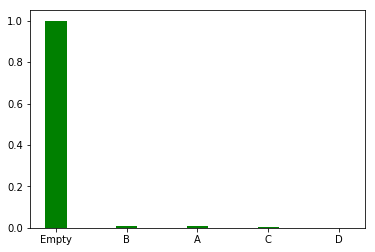

In [155]:
#['X', 'B', 'A', 'C', 'D']
plt.figure()
plt.bar(x=x.index, height=x['norm'], width=.3, facecolor='green')
plt.show()

In [12]:
flights_df['CancellationCode'].value_counts()

B    54904
A    54330
C    28188
D       12
Name: CancellationCode, dtype: int64

**13. Which route is the most frequent, in terms of the number of flights?**

(Take a look at _'Origin'_ and _'Dest'_ features. Consider _A->B_ and _B->A_ directions as _different_ routes) 

 - New-York – Washington (JFK-IAD)
 - San-Francisco – Los-Angeles (SFO-LAX)
 - San-Jose – Dallas (SJC-DFW)
 - New-York – San-Francisco (JFK-SFO)

In [122]:
flights_df\
    .groupby('Origin')\
    ['Dest'].value_counts()\
    .sort_values(ascending=False)\
    .head(3)

Origin  Dest
SFO     LAX     13788
LAX     SFO     13390
OGG     HNL     12383
Name: Dest, dtype: int64

**14. Find top-5 delayed routes (count how many times they were delayed on departure). From all flights on these 5 routes, count all flights with weather conditions contributing to a delay.**

_Hint_: consider only positive delays

- 449 
- 539 
- 549 
- 668

In [428]:
flights_df.WeatherDelay.nunique()

599

In [158]:
top5_delay = \
    flights_df[flights_df['DepDelay'] > 0]\
    .groupby(['Origin'])\
    ['Dest'].value_counts()\
    .sort_values(ascending=False)\
    .head(5)

top5_delay

Origin  Dest
LAX     SFO     6253
DAL     HOU     5742
SFO     LAX     5322
ORD     LGA     5311
HOU     DAL     5288
Name: Dest, dtype: int64

In [171]:
total_weather = 0

by_weather = flights_df[flights_df['WeatherDelay'] > 0]

for (origin, destination), _ in top5_delay.items():

    by_route = by_weather.query('(Origin == @origin) & (Dest == @destination)')
    total_weather += by_route['WeatherDelay'].count()
    
print(total_weather)

668


**15. Examine the hourly distribution of departure times. Choose all correct statements:**

 - Flights are normally distributed within time interval [0-23] (Search for: Normal distribution, bell curve).
 - Flights are uniformly distributed within time interval [0-23].
 - In the period from 0 am to 4 am there are considerably less flights than from 7 pm to 8 pm.

In [182]:
x = flights_df.query('Cancelled == 0') 

hour_distr = pd.DataFrame(x.groupby('DepHour')['Cancelled'].count())

In [241]:
hour_distr['norm'] = ((1 / (hour_distr.Cancelled.max())
                      * (hour_distr.Cancelled)))
hour_distr

,Cancelled,norm
DepHour,,
0.0,20361,0.045333
1.0,5857,0.013040
2.0,1850,0.004119
3.0,833,0.001855
4.0,3389,0.007545
5.0,148143,0.329833
6.0,446657,0.994461
7.0,436617,0.972107
8.0,449145,1.000000


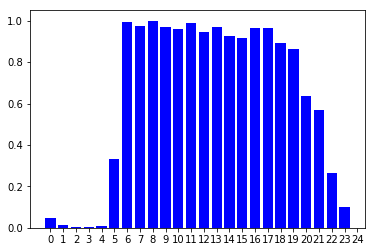

In [242]:
plt.figure()
plt.bar(x=hour_distr.index, height=hour_distr['norm'], width=.8, facecolor='blue')
plt.xticks(np.arange(0, 25, 1))
plt.show()

**16. Show how the number of flights changes through time (on the daily/weekly/monthly basis) and interpret the findings.**

**Choose all correct statements:**
- The number of flights during weekends is less than during weekdays (working days). 
- The lowest number of flights is on Sunday.
- There are less flights during winter than during summer.

_Hint_: Look for official meteorological winter months for the Nothern Hemisphsere.

In [299]:
daily_distr = pd.DataFrame(flights_df.groupby(['DayOfWeek'])
                           ['UniqueCarrier', 'FlightNum',].size(), 
                           columns=['count'])
daily_distr

,count
DayOfWeek,
1,1036201
2,1032049
3,1039665
4,1032224
5,1035166
6,857536
7,976887


In [300]:
def norm_0_1(data, data_max):
    return ((1 / data_max) * (data))

def plot_bar(x, y, width, color):
    plt.figure()
    plt.bar(x=x, height=y, width=width, facecolor=color)
    return plt.show()

In [301]:
daily_distr['norm'] = norm_0_1(daily_distr['count'], 
                               daily_distr['count'].max())
daily_distr

,count,norm
DayOfWeek,,
1,1036201,0.996668
2,1032049,0.992675
3,1039665,1.000000
4,1032224,0.992843
5,1035166,0.995673
6,857536,0.824820
7,976887,0.939617


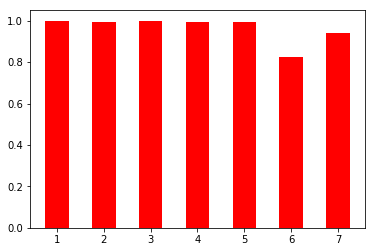

In [303]:
plot_bar(daily_distr.index, daily_distr.norm, 0.5, 'red')

In [306]:
month_distr = pd.DataFrame(flights_df.groupby(['Month'])
                           ['UniqueCarrier', 'FlightNum',].size(), 
                           columns=['count'])

In [307]:
month_distr['norm'] = norm_0_1(month_distr['count'], 
                               month_distr['count'].max())
month_distr

,count,norm
Month,,
1,605765,0.964700
2,569236,0.906526
3,616090,0.981143
4,598126,0.952535
5,606293,0.965541
6,608665,0.969318
7,627931,1.000000
8,612279,0.975074
9,540908,0.861413


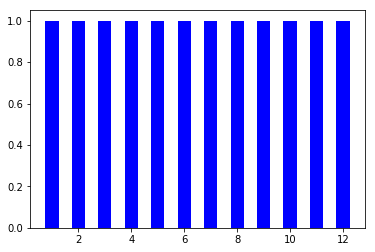

In [312]:
plot_bar(month_distr.index, month_distr['norm'].max(), .5, 'b')

In [326]:
# Summer runs from June 1 to August 31
# Winter runs from December 1 to February 28
summer_flights = month_distr.iloc[5:8, :1].sum()
winder_flights = month_distr.iloc[0:3, :1].sum()
print('Winter: {}'
      '\nSummer: {}'
      .format(winder_flights[0], summer_flights[0]))

winder_flights < summer_flights

Winter: 1791091
Summer: 1848875


count    True
dtype: bool

**17. Examine the distribution of cancellation reasons with time. Make a bar plot of cancellation reasons aggregated by months.**

**Choose all correct statements:**
- October has the lowest number of cancellations due to weather. 
- The highest number of cancellations in September is due to Security reasons.
- April's top cancellation reason is carriers.
- Flights cancellations due to National Air System are more frequent than those due to carriers.

In [496]:
month_cancel = pd.DataFrame()
codes = np.array([])

In [497]:
month_cancel['month'] = np.arange(1, 13, 1)
month_cancel.set_index('month', inplace=True)

codes = flights_df.CancellationCode.unique()
codes = codes[1:]  # Exclude 'nan' label.

for code in codes:
    tmp = pd.DataFrame()
    tmp.set_index = np.arange(1, 13, 1)

    tmp['codes_distr'] = flights_df[flights_df.CancellationCode == code]\
        .groupby('Month').size()

    month_cancel[code] = tmp['codes_distr']

month_cancel.fillna(0, inplace=True)
month_cancel

,A,C,B,D
month,,,,
1,6635,3962,6711,0.0
2,6090,4470,10034,2.0
3,6038,2621,7520,4.0
4,7312,1564,1479,0.0
5,3157,1608,1461,3.0
6,4251,3232,3448,0.0
7,5292,2694,2612,0.0
8,3852,2401,3582,0.0
9,2246,1188,6478,1.0


In [527]:
def no_frame():
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
    return 0

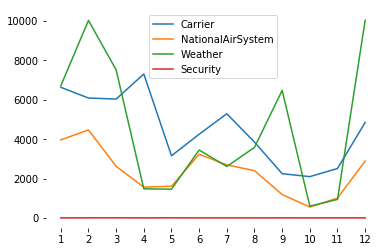

In [531]:
plt.figure(frameon=False)

plt.plot(month_cancel)
plt.xticks(np.arange(1, 13, 1))
plt.legend(['Carrier', 'NationalAirSystem', 'Weather', 'Security'])
plt.box(on=False)

plt.show()

**18. Which month has the greatest number of cancellations due to Carrier?** 
- May
- January
- September
- April

In [556]:
month_cancel\
    [month_cancel.A == month_cancel.A.max()]\
    .iloc[:, 0]

month
4    7312
Name: A, dtype: int64

**19. Identify the carrier with the greatest number of cancellations due to carrier in the corresponding month from the previous question.**

- 9E
- EV
- HA
- AA

In [566]:
flights_df\
    [(flights_df['CancellationCode'] == 'A') & 
     (flights_df['Month'] == 4)]\
    .groupby(['UniqueCarrier'])\
    ['Cancelled'].agg(sum)\
    .sort_values(ascending=False)\
    .head(2)

UniqueCarrier
AA    3696.0
WN     533.0
Name: Cancelled, dtype: float64

**20. Examine median arrival and departure delays (in time) by carrier. Which carrier has the lowest median delay time for both arrivals and departures? Leave only non-negative values of delay times ('ArrDelay', 'DepDelay').
([Boxplots](https://seaborn.pydata.org/generated/seaborn.boxplot.html) can be helpful in this exercise, as well as it might be a good idea to remove outliers in order to build nice graphs. You can exclude delay time values higher than a corresponding .95 percentile).**

- EV
- OO
- AA
- AQ

In [611]:
delays_df = flights_df\
    [(flights_df['ArrDelay'] >= 0) & 
     (flights_df['DepDelay'] >= 0)]

delays_median= pd.DataFrame(delays_df\
    .groupby('UniqueCarrier')\
    [['ArrDelay', 'DepDelay']].median())

print(delays_median.sort_values(by='ArrDelay', ascending=True).head())
print(delays_median.sort_values(by='DepDelay', ascending=True).head())

delays_median.reset_index(inplace=True)
delays_median.head()

               ArrDelay  DepDelay
UniqueCarrier                    
AQ                  6.0       5.0
HA                  9.0       7.0
WN                 14.0      15.0
F9                 14.0      12.0
AS                 18.0      16.0
               ArrDelay  DepDelay
UniqueCarrier                    
AQ                  6.0       5.0
HA                  9.0       7.0
OH                 18.0      11.0
F9                 14.0      12.0
WN                 14.0      15.0


,UniqueCarrier,ArrDelay,DepDelay
0,9E,23.0,21.0
1,AA,25.0,22.0
2,AQ,6.0,5.0
3,AS,18.0,16.0
4,B6,31.0,28.0


In [621]:
arr_q95, dep_q95 = delays_df[['ArrDelay', 'DepDelay']].quantile(0.95)

delays_df = delays_df[(delays_df['ArrDelay'] <= arr_q95) & 
                      (delays_df['DepDelay'] <= dep_q95)]

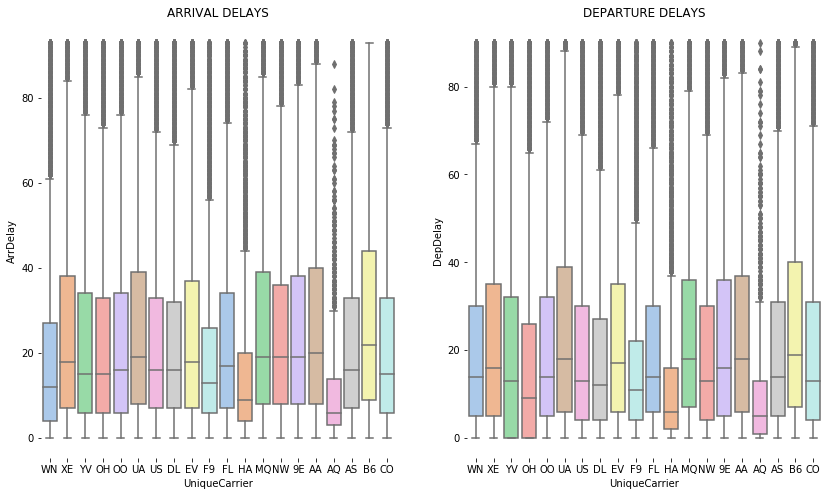

In [626]:
plt.figure(figsize=(14, 8))

plt.subplot(1, 2, 1)
sns.boxplot(x='UniqueCarrier', y='ArrDelay', data=delays_df, palette='pastel')
plt.title('ARRIVAL DELAYS')
plt.box(on=False)

plt.subplot(1, 2, 2)
sns.boxplot(x='UniqueCarrier', y='DepDelay', data=delays_df, palette='pastel')
plt.title('DEPARTURE DELAYS')
plt.box(on=False)

plt.show()

That's it! Now go and do 30 push-ups! :)